In [3]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd

df = pd.read_csv("abalone.csv")

Populating the interactive namespace from numpy and matplotlib


Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1

In [4]:
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь долей правильных ответов (sklearn.metrics.r2_score). Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

In [35]:
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

def r2_scores_of_n_trees(data, target):
    kf = KFold(len(data.index), n_folds=5, shuffle=True, random_state=1)
    data = data.values
    n_trees = range(1, 51)
    r2_scores = []
    for n in n_trees:
        scores = []
        for train_index, test_index in kf:
            clf = RandomForestRegressor(n_estimators=n, random_state=1)
            clf.fit(data[train_index], target[train_index])
            predictions = clf.predict(data[test_index])
            scores.append(r2_score(target[test_index], predictions))
        r2_scores.append(np.mean(scores))
    return r2_scores
    
r2_scores = r2_scores_of_n_trees(df[df.columns[:-1]], df['Rings'])

Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52. Это количество и будет ответом на задание.

22


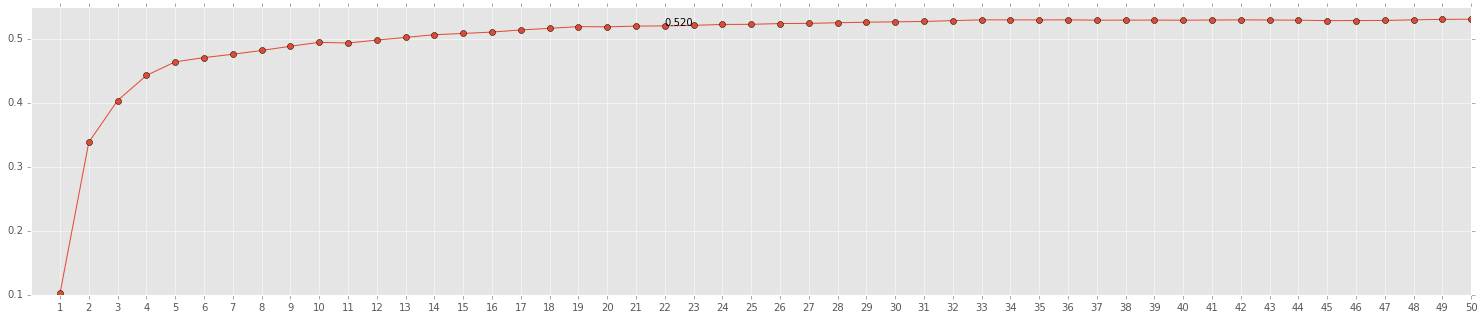

In [37]:
f = pylab.figure(figsize=(20,4))
ax = f.add_axes([0, 0, 1, 1])
n_trees = range(1, 51)
ax.plot(n_trees, r2_scores, '-o')
ax.set_xticks(n_trees)
ax.set_xticklabels(n_trees)
for i in n_trees:
    if r2_scores[i-1] > 0.52:
        plt.annotate("{0:.3f}".format(r2_scores[i-1]), (i, r2_scores[i-1]))
        print i
        break
f.show()

In [38]:
with open("submissions/5_1.txt", "w") as f:
    f.write("22")